In [1]:
# SETUP ---------------------------------------------------------------------
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd

from scripts.config import get_paths
from scripts.preprocessor import load_data
from scripts.country_comparison import (
    plot_metric_boxplots, compute_summary_statistics,
    run_statistical_tests, plot_average_ghi
)

# LOAD DATA ----------------------------------------------------------------
paths = get_paths()

benin = load_data(paths['CLEAN_benin_CSV'])
sierraleone = load_data(paths['CLEAN_sierraleone_CSV'])
togo = load_data(paths['CLEAN_togo_CSV'])

benin["Country"] = "Benin"
sierraleone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)



/home/yeab/solar-challenge-week1/scripts/country_comparison.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


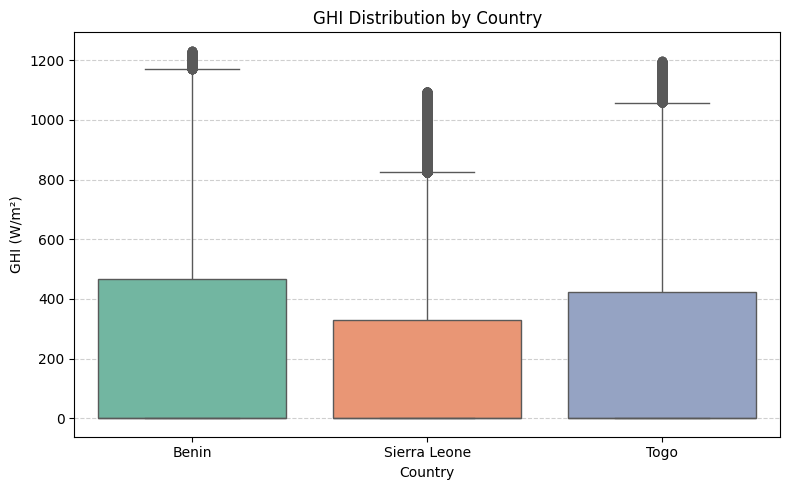

/home/yeab/solar-challenge-week1/scripts/country_comparison.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


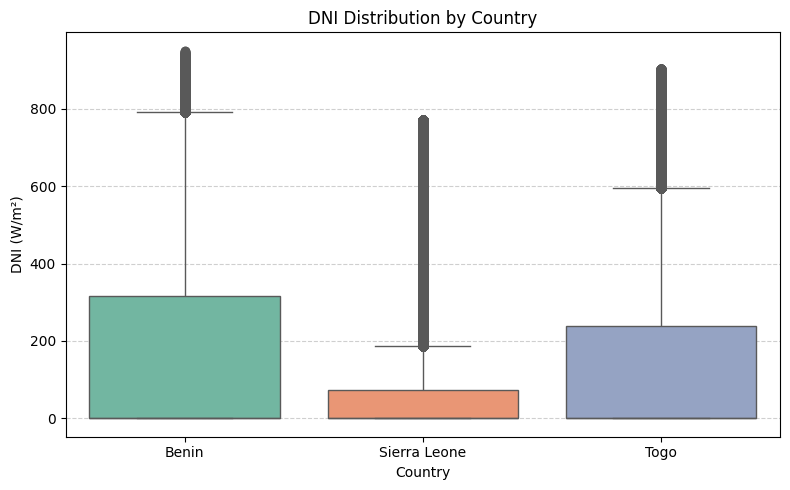

/home/yeab/solar-challenge-week1/scripts/country_comparison.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


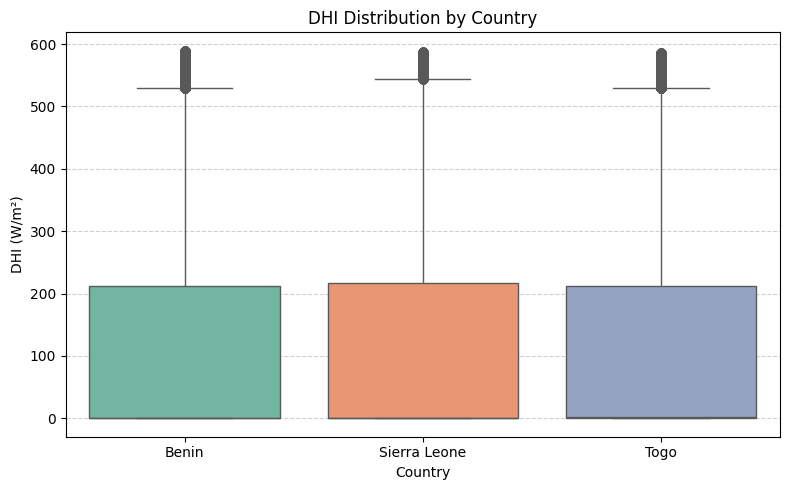

In [2]:
# METRIC COMPARISON - BOXPLOTS ---------------------------------------------
plot_metric_boxplots(df_all)


In [3]:
# SUMMARY STATISTICS -------------------------------------------------------
summary = compute_summary_statistics(df_all)
summary


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,237.484571,0.6,327.168111,167.144091,0.0,261.940361,113.166760,0.4,151.660240
1,Sierra Leone,187.214752,0.0,277.016414,104.210233,0.0,200.824799,110.503601,0.0,151.444586
2,Togo,225.028731,0.5,316.449213,147.968936,0.0,247.676535,112.777219,1.5,151.567919


In [4]:
# STATISTICAL TESTING ------------------------------------------------------

pvals = run_statistical_tests(benin, sierraleone, togo)
print(f"ANOVA p-value: {pvals['ANOVA_p_value']:.4f}")
print(f"Kruskal–Wallis p-value: {pvals['Kruskal_p_value']:.4f}")


ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000


/home/yeab/solar-challenge-week1/scripts/country_comparison.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis")


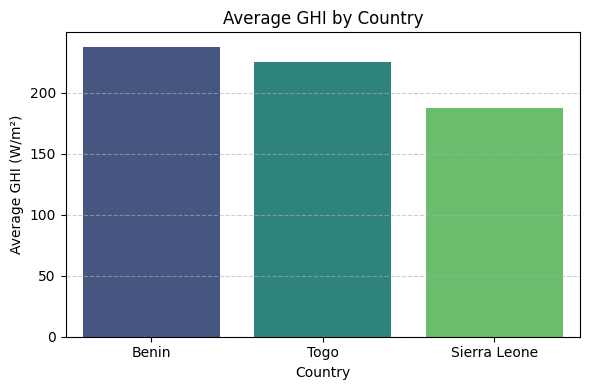

In [5]:
plot_average_ghi(df_all)
